In [1]:
!pip install pyportfolioopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 KB 198.9 kB/s eta 0:00:0000:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 1.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 1.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.22.4 which is incompatible.


In [1]:
import pandas as pd
import yfinance as yf
import pypfopt

In [2]:
START = '2019-01-02'
END = '2019-05-26'
ASSETS = ['AAPL', 'TSLA', 'PFE', 'SHEL', 'EQIX',
              'NFLX', 'WMT', 'GS', 'CBT', 'UPS', 'PFE']

In [3]:
prices_df = yf.download(ASSETS, start=START, 
                        end=END)
prices_df['Adj Close']

[*********************100%***********************]  10 of 10 completed


,AAPL,CBT,EQIX,GS,NFLX,PFE,SHEL,TSLA,UPS,WMT
Date,,,,,,,,,,
2019-01-02,38.047043,38.645779,326.783722,156.473297,267.660004,35.108089,49.255325,20.674667,85.374222,87.205627
2019-01-03,34.257286,37.605385,322.993042,154.181183,271.200012,34.125874,49.147415,20.024000,82.950287,86.757141
2019-01-04,35.719696,39.312695,330.322418,159.220200,297.570007,34.905151,50.259686,21.179333,85.839699,87.299042
2019-01-07,35.640190,39.623924,330.985260,160.102493,315.339996,35.091854,50.326092,22.330667,85.549881,88.326736
2019-01-08,36.319607,39.801765,337.857025,159.511261,320.269989,35.254208,50.018967,22.356667,85.558678,88.943344
...,...,...,...,...,...,...,...,...,...,...
2019-05-20,44.470940,37.957348,450.858154,180.128036,348.109985,34.357479,55.088058,13.690667,88.119011,95.864914
2019-05-21,45.323494,39.210949,457.267090,181.835785,354.269989,34.423573,55.122261,13.672000,88.915054,95.487198
2019-05-22,44.395645,38.252842,466.271790,178.557297,359.730011,34.687920,54.481003,12.848667,87.206696,96.535385


In [4]:
df = prices_df['Adj Close']

In [23]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

mu = mean_historical_return(df)
S = CovarianceShrinkage(df).ledoit_wolf() # Adjusted Covariance Matrix

In [29]:
S # the one we use in Portfolio Allocation! 

,AAPL,CBT,EQIX,GS,NFLX,PFE,SHEL,TSLA,UPS,WMT
AAPL,0.093922,0.035540,0.011850,0.024702,0.041343,0.014009,0.013681,0.040137,0.022415,-0.000026
CBT,0.035540,0.113253,0.009725,0.031360,0.031622,0.011957,0.014181,0.023419,0.028054,0.002756
EQIX,0.011850,0.009725,0.053130,-0.000074,0.019899,0.009290,0.006687,0.021709,0.009255,0.004155
GS,0.024702,0.031360,-0.000074,0.068874,0.015685,0.000169,0.009332,0.021822,0.013687,0.006163
NFLX,0.041343,0.031622,0.019899,0.015685,0.125479,0.012135,0.018217,0.059735,0.010641,0.003320
PFE,0.014009,0.011957,0.009290,0.000169,0.012135,0.045028,0.011081,0.008095,0.009426,0.003426
SHEL,0.013681,0.014181,0.006687,0.009332,0.018217,0.011081,0.036149,0.012522,0.013541,0.003534
TSLA,0.040137,0.023419,0.021709,0.021822,0.059735,0.008095,0.012522,0.211536,0.025023,0.002089
UPS,0.022415,0.028054,0.009255,0.013687,0.010641,0.009426,0.013541,0.025023,0.061109,0.004962
WMT,-0.000026,0.002756,0.004155,0.006163,0.003320,0.003426,0.003534,0.002089,0.004962,0.030688


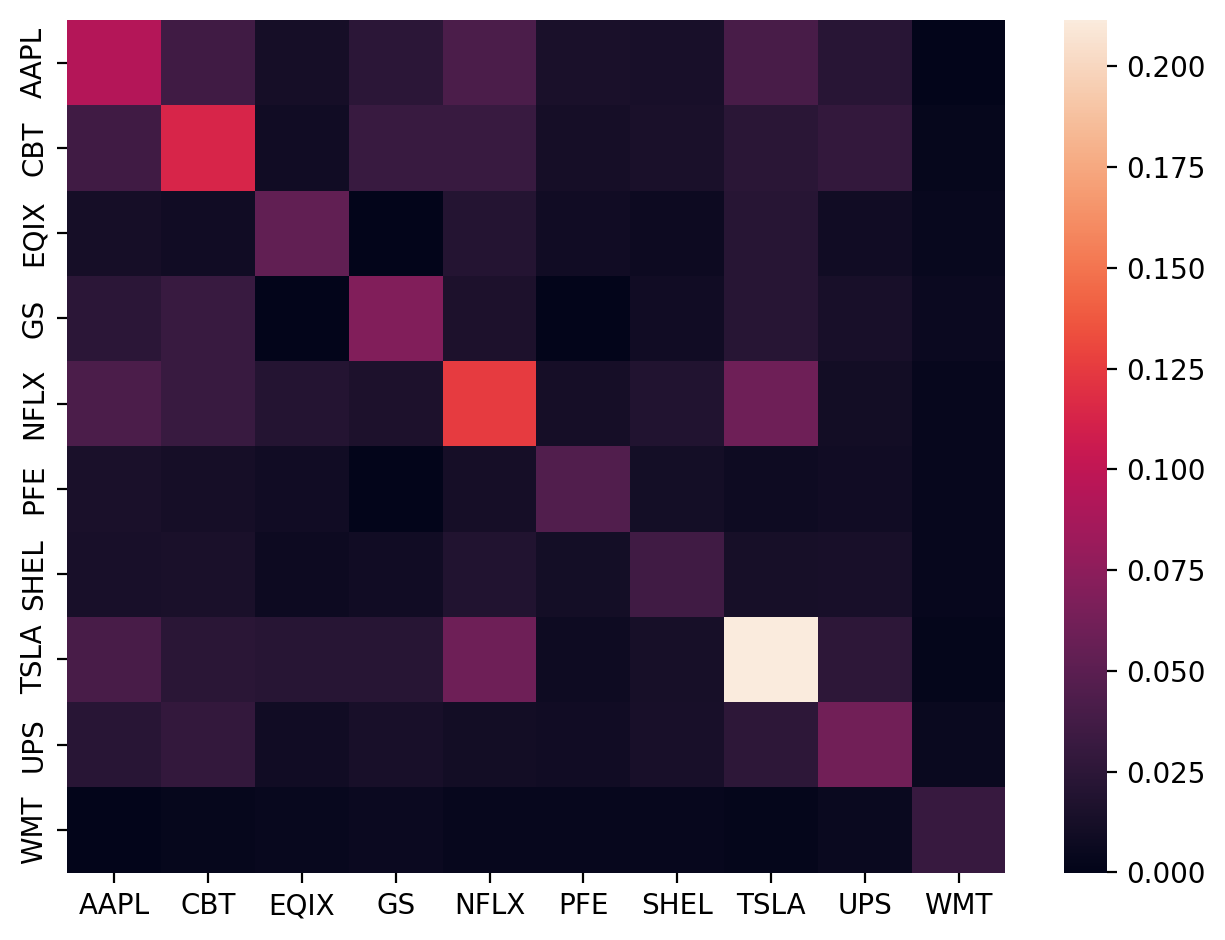

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(dpi=200)
sns.heatmap(S)
plt.tight_layout()

<AxesSubplot:>

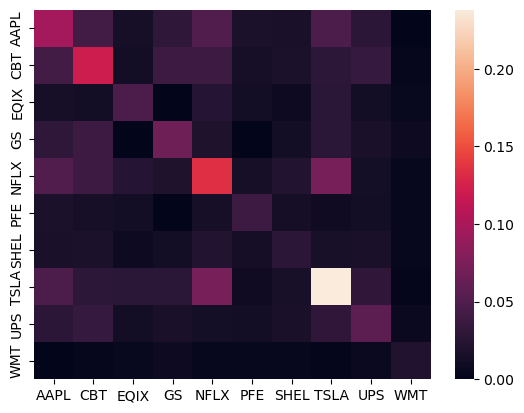

In [24]:
sns.heatmap(pypfopt.risk_models.sample_cov(df)) # Simple Covariance